## K-means Algorithm

### pseudo code

```
for i = 1 to W {
    Random Initialization of K clusters from training examples
    # Assign points to cluster centroids 
      for i = 1 to m:
            c(i) = index of cluster centroid closest to x(i),  (from 1 to K)

    # Move cluster centroid 
      for k= 1 to K:
          miu(k) = average of points assigned to the cluster 
          }
```       

## Implementation of K-means by NumPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def init_centroids(K, X):
    '''
    Initialize K cluster centroids by randomly selecting data points from the dataset X.
    
    Parameters:
        K (int): Number of clusters.
        X (array-like): Training data with shape (n_samples, n_features).
    
    Returns:
        centroids (array): Selected cluster centroids with shape (K, n_features).
    '''
    # Get the number of data points (rows) in X
    number_of_rows = X.shape[0]
    
    # Randomly select K unique indices as centroid indices
    random_indices = np.random.choice(number_of_rows, size=K, replace=False)
    
    # Use the selected indices to get the corresponding data points as centroids
    centroids = X[random_indices, :]
    
    return centroids


def assign_points_to_centroids(centroids, X):
    '''
    Assign each data point in X to its closest centroid.
    
    Parameters:
        centroids (array): Cluster centroids with shape (K, n_features).
        X (array-like): Data points with shape (n_samples, n_features).
    
    Returns:
        assigned_clusters (array): Array of cluster assignments for each data point (shape: n_samples).
    '''
    n_samples = X.shape[0]
    assigned_clusters = np.empty(n_samples, dtype=int)
    
    for i, x in enumerate(X):
        # Calculate the squared distance between the data point and each centroid
        dist_list = [np.linalg.norm(x - c) for c in centroids]
        
        # Find the index of the closest centroid (cluster) for the data point
        assigned_clusters[i] = np.argmin(dist_list)

    return assigned_clusters


def update_centroids(assigned_clusters, X, K):
    '''
    Update the cluster centroids based on the assigned data points.
    
    Parameters:
        assigned_clusters (array): Array of cluster assignments for each data point (shape: n_samples).
        X (array-like): Data points with shape (n_samples, n_features).
        K (int): Number of clusters.
    
    Returns:
        updated_centroids (array): Updated cluster centroids with shape (K, n_features).
    '''
    m, n = X.shape
    updated_centroids = np.zeros((K, n), dtype=int)
    
    for k in range(K):
        # Filter data points belonging to cluster k
        cluster_k_points = X[assigned_clusters == k]
        
        if cluster_k_points.size > 0:
            # Update the centroid by calculating the mean of the data points in the cluster
            updated_centroids[k] = np.mean(cluster_k_points, axis=0)
        else:
            # If a cluster has no data points, randomly choose a data point from the dataset
            random_index = np.random.choice(m)
            updated_centroids[k] = X[random_index, :]
    
    return updated_centroids


def k_means(K, X, R):
    '''
    Perform K-means clustering on the dataset X.
    
    Parameters:
        K (int): Number of clusters.
        X (array-like): Data points with shape (n_samples, n_features).
        R (int): Number of iterations (repetitions) of the algorithm.
    
    Returns:
        centroids (array): Final cluster centroids after R iterations (shape: K, n_features).
        assigned_clusters (array): Array of cluster assignments for each data point (shape: n_samples).
    '''
    # Initialize cluster centroids
    init_cents = init_centroids(K, X)
    centroids = init_cents
    
    for i in range(R):
        # Assign data points to the closest centroids
        assigned_clusters = assign_points_to_centroids(centroids, X)
        
        # Update cluster centroids based on the assigned data points
        centroids = update_centroids(assigned_clusters, X, K)
        
    return centroids, assigned_clusters


### K-Means on image

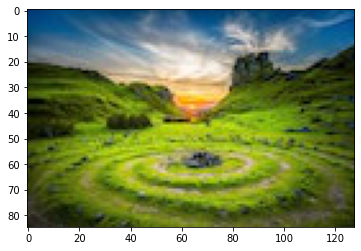

In [4]:
original_img = plt.imread('image.jpeg')
plt.imshow(original_img)

In [5]:
print('Original image sizes: ', original_img.shape)

Original image sizes:  (85, 128, 3)


## Implementation by NumPy

In [20]:
X = original_img.reshape(-1,3)
centroids , idx = k_means(K=16,X=X,R=100)

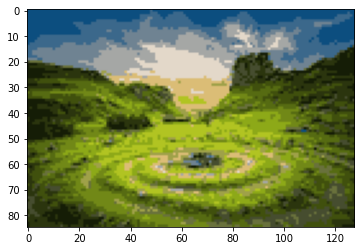

In [21]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 
plt.imshow(X_recovered)


## Implementation by Scikit-Learn

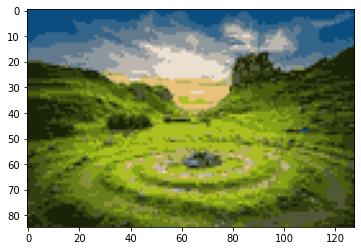

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)
centroids_skl = kmeans.cluster_centers_
idx_skl = kmeans.labels_
# Represent image in terms of indices
X_recovered = centroids_skl[idx_skl, :].astype('int')

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 
plt.imshow(X_recovered)